# Real Estate Market Predictor 
### USA Real Estate Dataset

In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('realtor-data.zip.csv')
data.head(5)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [8]:
# Data Understanding

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [9]:
data.describe()

,brokered_by,price,bed,bath,acre_lot,street,zip_code,house_size
count,2.221849e+06,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.215516e+06,2.226083e+06,1.657898e+06
mean,5.293989e+04,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,1.012325e+06,5.218668e+04,2.714471e+03
std,3.064275e+04,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,5.837635e+05,2.895408e+04,8.081635e+05
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,2.386100e+04,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,5.063128e+05,2.961700e+04,1.300000e+03
50%,5.288400e+04,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,1.012766e+06,4.838200e+04,1.760000e+03
75%,7.918300e+04,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,1.521173e+06,7.807000e+04,2.413000e+03
max,1.101420e+05,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,2.001357e+06,9.999900e+04,1.040400e+09


In [10]:
data.isna().sum()

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64

In [11]:
# Data preparation
# Data cleaning
# Drop columns that we don't need.
data.drop(columns = ['prev_sold_date', 'zip_code', 'brokered_by'], inplace = True)
data

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
4,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,NaN
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [14]:
# Eliminate NA values
data.dropna(inplace = True)
data

,status,price,bed,bath,acre_lot,street,city,state,house_size
0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,920.0
1,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,1527.0
2,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,748.0
3,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,1800.0
5,for_sale,179000.0,4.0,3.0,0.46,1850806.0,San Sebastian,Puerto Rico,2520.0
...,...,...,...,...,...,...,...,...,...
2226377,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,3600.0
2226378,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,1616.0
2226379,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,3200.0
2226380,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,933.0


In [15]:
# Check for duplicates
data.duplicated().sum()

np.int64(535)

In [17]:
# Remove duplicates
data.drop_duplicates(inplace = True)
data.duplicated().sum()

np.int64(0)

In [ ]:
# Import for bar graph
import matplotlib.pyplot as plt

Text(0.5, 0, 'State')

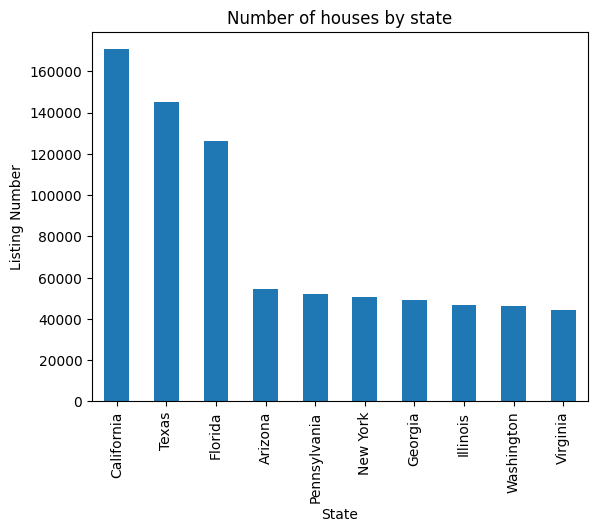

In [22]:
data['state'].value_counts().sort_values(ascending= False).head(10).plot(kind = "bar")
plt.title("Number of houses by state")
plt.ylabel("Listing Number")
plt.xlabel("State")


In [23]:
data.groupby("state")["price"].mean().sort_values(ascending=False).astype(int)

state
Virgin Islands          1947522
Hawaii                  1491548
District of Columbia    1209649
California              1107572
Colorado                 952486
Utah                     914531
Montana                  862815
Connecticut              790488
Massachusetts            754230
Nevada                   751439
Washington               727478
Wyoming                  719581
Guam                     717504
Idaho                    689815
New York                 657557
Florida                  649977
Oregon                   645160
New Hampshire            640991
Puerto Rico              632210
Vermont                  557932
Arizona                  552891
Virginia                 546274
Alaska                   541288
New Jersey               541131
Maine                    517891
Rhode Island             511094
Maryland                 502889
South Carolina           485025
Tennessee                485018
Texas                    450757
South Dakota             440008
No

In [ ]:
# Group multiple columns
data.groupby(["state", "city"])["price"].mean().reset_index()

,state,city,price
0,Alabama,Abbeville,2.201540e+05
1,Alabama,Adamsville,1.384411e+05
2,Alabama,Addison,1.459500e+05
3,Alabama,Adger,1.743727e+05
4,Alabama,Akron,4.389400e+05
...,...,...,...
26255,Wyoming,Wheatland,2.815783e+05
26256,Wyoming,Wilson,5.719900e+06
26257,Wyoming,Worland,2.889077e+05
26258,Wyoming,Wright,2.911600e+05


In [31]:
# Look for the correlation between the different variables and the price.
data.select_dtypes(include=['number']).corr()["price"]

price         1.000000
bed           0.117585
bath          0.208868
acre_lot      0.005304
street        0.000481
house_size    0.073849
Name: price, dtype: float64

In [75]:
# Start Modeling

X = data[["bed", "bath", "house_size"]]
y = data["price"] 


In [76]:
X

,bed,bath,house_size
0,3.0,2.0,920.0
1,4.0,2.0,1527.0
2,2.0,1.0,748.0
3,4.0,2.0,1800.0
5,4.0,3.0,2520.0
...,...,...,...
2226377,4.0,2.0,3600.0
2226378,3.0,2.0,1616.0
2226379,6.0,3.0,3200.0
2226380,2.0,1.0,933.0


In [77]:
y

0          105000.0
1           80000.0
2           67000.0
3          145000.0
5          179000.0
             ...   
2226377    359900.0
2226378    350000.0
2226379    440000.0
2226380    179900.0
2226381    580000.0
Name: price, Length: 1355862, dtype: float64

In [78]:
# Create app.py with the order of the columns from the predictor model.
X.columns

Index(['bed', 'bath', 'house_size'], dtype='object')

In [79]:
# Linear Regression for predicting in this case

# Split data
# Import to split
from sklearn.model_selection import train_test_split

In [80]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2)

In [81]:
# Normalize the data

# Import for normalize the data with Z-score
from sklearn.preprocessing import StandardScaler

In [82]:
# Initialize the StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.42418104, -0.39869745, -0.05403386],
       [ 0.42418104,  0.33644083,  0.08164552],
       [-0.95879539, -1.13383573, -0.30723832],
       ...,
       [ 2.49864568,  4.01213224,  1.68591078],
       [ 0.42418104,  0.33644083,  0.11413213],
       [ 1.80715746,  1.07157911,  0.1040995 ]])

In [ ]:
# Save Scaler object to a file so it can be reuse later with new data without having to fit it again on the data.
import joblib
joblib.dump(scaler,"Scaler.pkl")


['Scaler.pkl']

In [84]:
# Fit the data
X_test = scaler.fit_transform(X_test)


In [85]:
# Train our model
# Import for the training of model

from sklearn.linear_model import LinearRegression


In [93]:
# Initialize LinearRegression

lr = LinearRegression()

# Fit the data
lr.fit(X_train, y_train) 

LinearRegression()

In [94]:
predictions = lr.predict(X_test)

In [95]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, predictions) 

np.float64(360580.51341801666)

In [96]:
# Export the model

joblib.dump(lr, "model.pkl")

['model.pkl']